In [1]:
from ultralytics import YOLO
import cv2
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import umap.umap_ as umap


In [ ]:
model = YOLO("best.pt")
rel_path = 'Data_Raw/bees/_bee_20230609a/images'
image_files = sorted([f for f in os.listdir(rel_path) if f.endswith('.jpg')])
os.makedirs("cropped_bees", exist_ok=True)

In [9]:
for image_file in image_files:
    image_path = os.path.join(rel_path, image_file)
    results = model(image_path, save=True)
    image = cv2.imread(image_path)

    for result in results:
        for i, box in enumerate(result.boxes):
            # Filter out detections with confidence lower than 50%
            if box.conf.item() < 0.5:
                continue

            x1, y1, x2, y2 = map(int, box.xyxy[0])
            cropped_bee = image[y1:y2, x1:x2]
            save_path = os.path.join("cropped_bees", f"cropped_bee_{os.path.splitext(image_file)[0]}_{i}.jpg")
            cv2.imwrite(save_path, cropped_bee)
            print(f"Saved: {save_path}")


image 1/1 c:\Users\Anurath\Desktop\Projects\Masters\Data_Raw\bees\_bee_20230609a\images\20230609a1002.jpg: 384x640 7 bees, 14.6ms
Speed: 1.6ms preprocess, 14.6ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs\detect\predict
Saved: cropped_bees\cropped_bee_20230609a1002_0.jpg
Saved: cropped_bees\cropped_bee_20230609a1002_1.jpg
Saved: cropped_bees\cropped_bee_20230609a1002_2.jpg
Saved: cropped_bees\cropped_bee_20230609a1002_3.jpg
Saved: cropped_bees\cropped_bee_20230609a1002_4.jpg
Saved: cropped_bees\cropped_bee_20230609a1002_5.jpg

image 1/1 c:\Users\Anurath\Desktop\Projects\Masters\Data_Raw\bees\_bee_20230609a\images\20230609a1008.jpg: 384x640 7 bees, 10.8ms
Speed: 1.8ms preprocess, 10.8ms inference, 4.6ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs\detect\predict
Saved: cropped_bees\cropped_bee_20230609a1008_0.jpg
Saved: cropped_bees\cropped_bee_20230609a1008_1.jpg
Saved: cropped_bees\cropped_bee_20230609a1008_2.jpg
Sa

In [ ]:
def extract_features(image_path, target_size=(224, 224)):
    # Load, resize and preprocess the image
    image = load_img(image_path, target_size=target_size)
    image = img_to_array(image)
    image = np.expand_dims(image, axis=0)
    image = preprocess_input(image)
    
    # Extract features
    features = model_resnet.predict(image) # type: ignore
    return features.flatten()

In [12]:
model_resnet = ResNet50(weights='imagenet', include_top=False, pooling='avg')
# Directory with cropped bee images
cropped_dir = "cropped_bees"
feature_list = []
filenames = []


In [14]:
for filename in os.listdir(cropped_dir):
    if filename.endswith('.jpg'):
        file_path = os.path.join(cropped_dir, filename)
        features = extract_features(file_path)
        feature_list.append(features)
        filenames.append(filename)

# feature_list now contains the feature vectors for each cropped bee image.
print("Extracted features for", len(feature_list), "images")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━

Cluster labels: [2 0 2 ... 1 0 3]


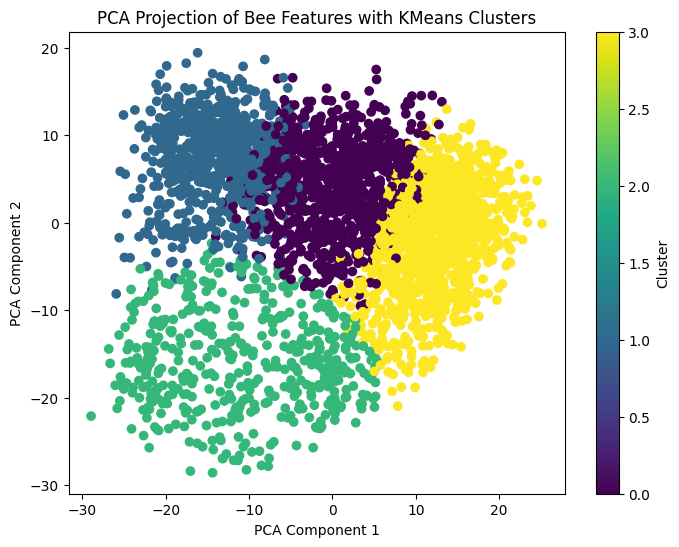

In [ ]:
features = np.array(feature_list)

# Step 1: Dimensionality reduction for visualization (2 components)
pca = PCA(n_components=2)
features_pca = pca.fit_transform(features)

# Step 2: Cluster the features using KMeans (4 clusters)
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(features)

print("Cluster labels:", clusters)

# Step 3: Visualize the clusters
plt.figure(figsize=(8,6))
plt.scatter(features_pca[:, 0], features_pca[:, 1], c=clusters, cmap='viridis')
plt.title("PCA Projection of Bee Features with KMeans Clusters")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label="Cluster")
plt.show()

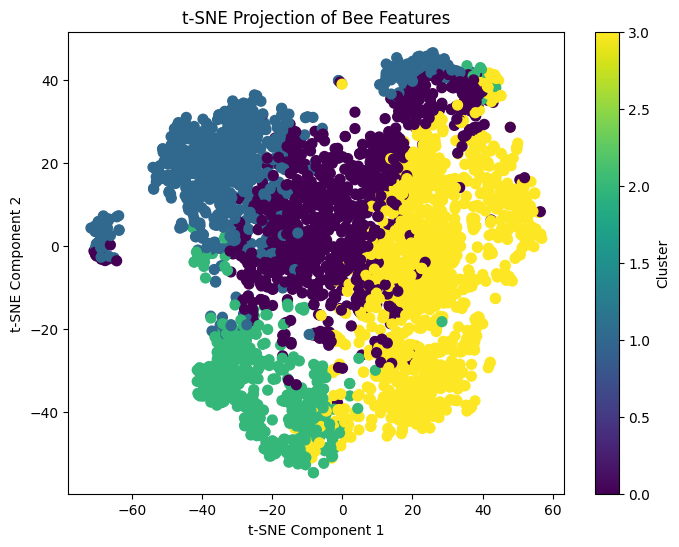

c:\Users\Anurath\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Anurath\AppData\Local\Programs\Python\Python312\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


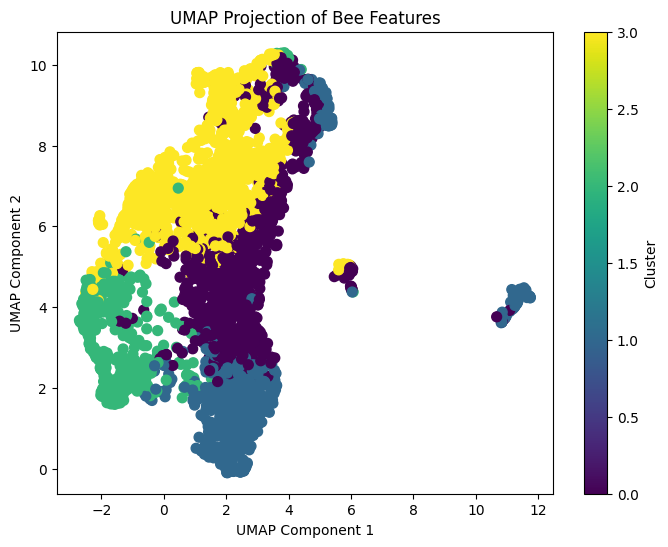

In [ ]:
# t-SNE visualization:
tsne = TSNE(n_components=2, random_state=42)
features_tsne = tsne.fit_transform(features)

plt.figure(figsize=(8,6))
plt.scatter(features_tsne[:,0], features_tsne[:,1], c=clusters, cmap='viridis', s=50)
plt.title("t-SNE Projection of Bee Features")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.colorbar(label="Cluster")
plt.show()

# UMAP visualization:
umap_reducer = umap.UMAP(n_components=2, random_state=42)
features_umap = umap_reducer.fit_transform(features)

plt.figure(figsize=(8,6))
plt.scatter(features_umap[:,0], features_umap[:,1], c=clusters, cmap='viridis', s=50)
plt.title("UMAP Projection of Bee Features")
plt.xlabel("UMAP Component 1")
plt.ylabel("UMAP Component 2")
plt.colorbar(label="Cluster")
plt.show()